# Sentiment Analysis for twitter data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [3]:
data=pd.read_csv('Tweets.csv')

In [4]:
data.shape

(14640, 15)

In [5]:
data.head(3)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)


In [6]:
count=data.airline.value_counts( sort=True, ascending=True)
count

Virgin America     504
Delta             2222
Southwest         2420
American          2759
US Airways        2913
United            3822
Name: airline, dtype: int64

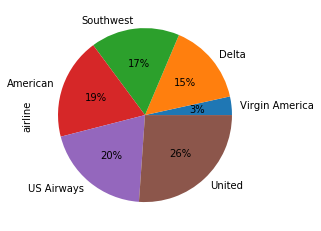

In [7]:
count.plot(kind='pie',  autopct='%1.0f%%')

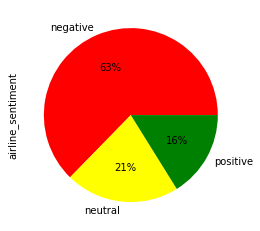

In [8]:
# all sentiments
data.airline_sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%',colors=["red", "yellow", "green"])

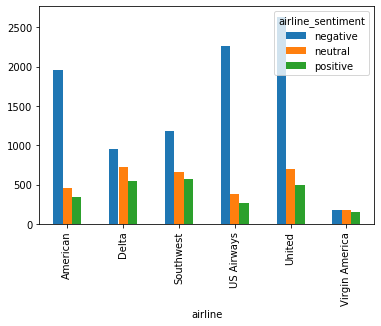

In [9]:
#airline_sentiment = data.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack()
#airline_sentiment.plot(kind='bar')
a= data.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack()
a.plot(kind='bar')

In [49]:
features = data.iloc[:, 10].values
labels=data.iloc[:,1]#all rows and column at index 1
labels.shape

(14640,)

In [51]:
y=[]
for label in labels:
    if label=='neutral':
         y.append(0)
    elif label=='positive':
        y.append(1)
    elif label=='negative':
        y.append(2)

##### Tweets contain many slang words and punctuation marks. We need to clean our tweets before they can be used for training the machine learning model. we can preprocess data in order to clean it. To do so, we will use regular expressions.

In [ ]:
X=[]
for feature in range(len(features)):
    # replace non-character like @, # with space
    processed_feature=re.sub(r'\W', ' ', str(features[feature])) 

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b' string might contan byte string so convert to string by removing b from begining
    processed_feature = re.sub(r'^b\s+', '', processed_feature)
    
    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    X.append(processed_feature)
    

##### TF-IDF is a combination of two terms. Term frequency and Inverse Document frequency. Using Scikit-Learn library to convert text data into TF- IDF vectors ( having numbers only)

###### In the code below, we define that the max_features should be 2500, which means that it only uses the 2500 most frequently occurring words to create a bag of words feature vector. Words that occur less frequently are not very useful for classification.Similarly, max_df specifies that only use those words that occur in a maximum of 80% of the documents. Words that occur in all documents are too common and are not very useful for classification. Similarly, min-df is set to 7 which shows that include words that occur in at least 7 documents.

In [ ]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8)
X = vectorizer.fit_transform(X).toarray()


In [ ]:
X.shape

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=45)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

#clf= RandomForestClassifier(n_estimators=500)
clf = svm.SVC(gamma='scale')
clf.fit(X_train, y_train)

In [ ]:
pred= clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#print(classification_report(y_test,pred))
print('accuracy= ',accuracy_score(y_test, pred))
conf_df=pd.DataFrame(confusion_matrix(y_test,pred))
conf_df


In [ ]:
#Prediction single test
# 0 -> neutral, 1-> positive, 2- negative